# 階層分群算法 (Hierarchical clustering) 範例

一種構建 cluster 的層次結構的算法。該算法從分配給自己 cluster 的所有資料點開始。然後，兩個距離最近的 cluster 合併為同一個 cluster。最後，當只剩下一個 cluster 時，該算法結束。

### 階層分群演算法流程
 1. 每筆資料為一個 cluster
 2. 計算每兩兩群之間的距離
 3. 將最近的兩兩群合併成⼀一群
 4. 重覆步驟 2、3，直到所有資料合併成同一 cluster

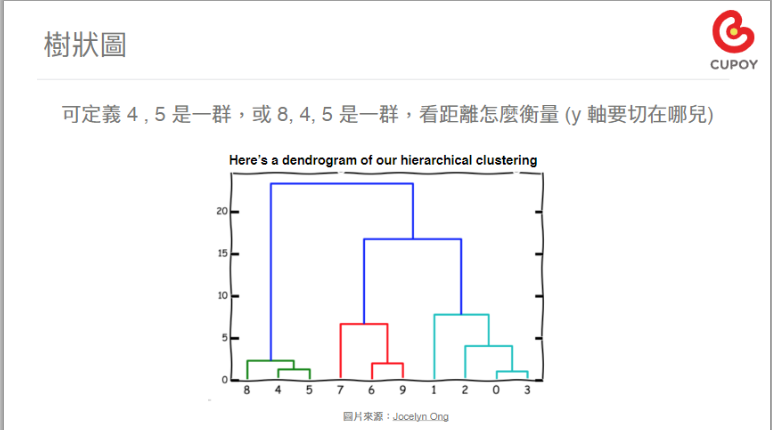

---
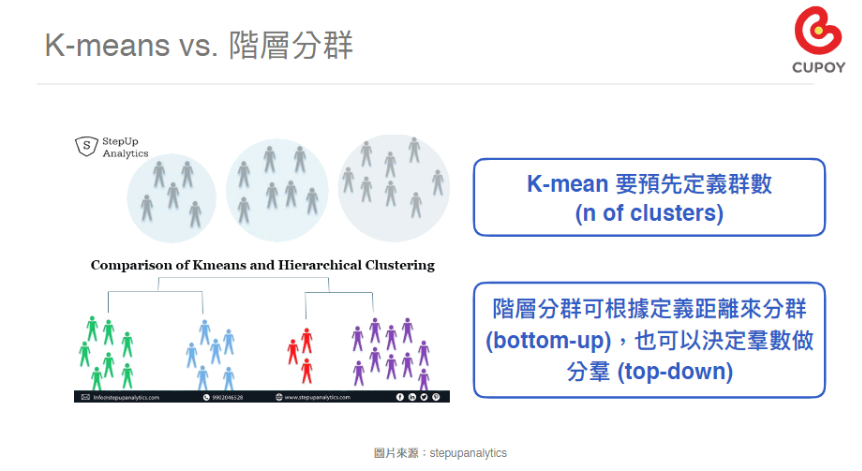

---
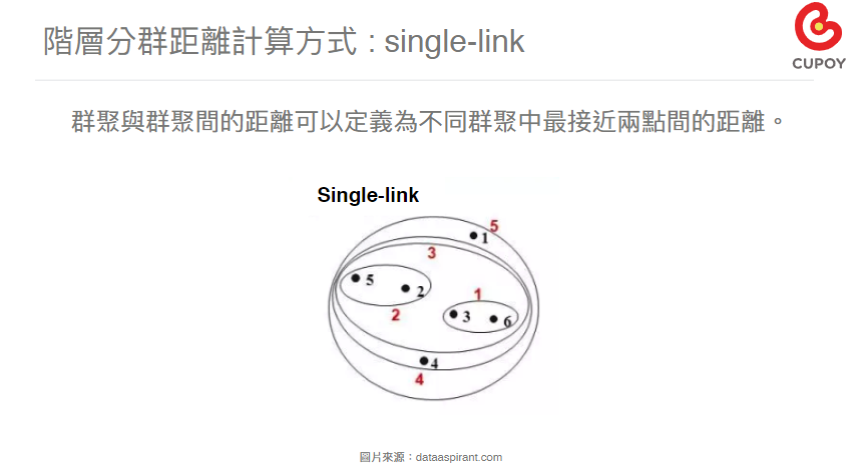

---
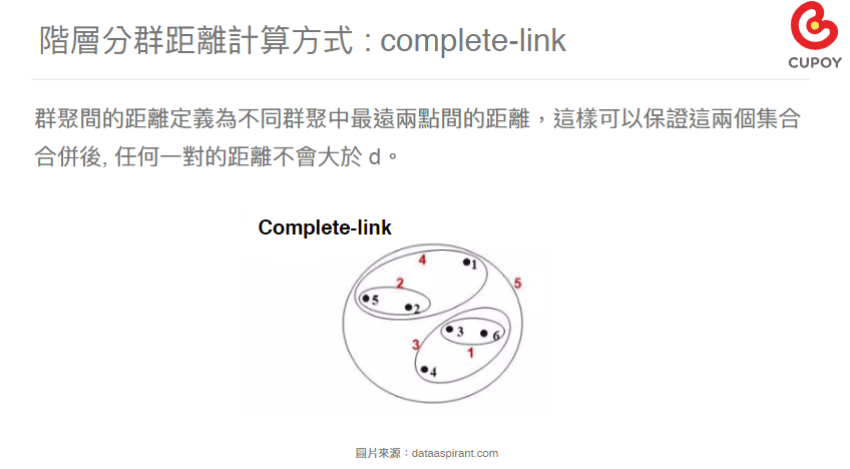

---
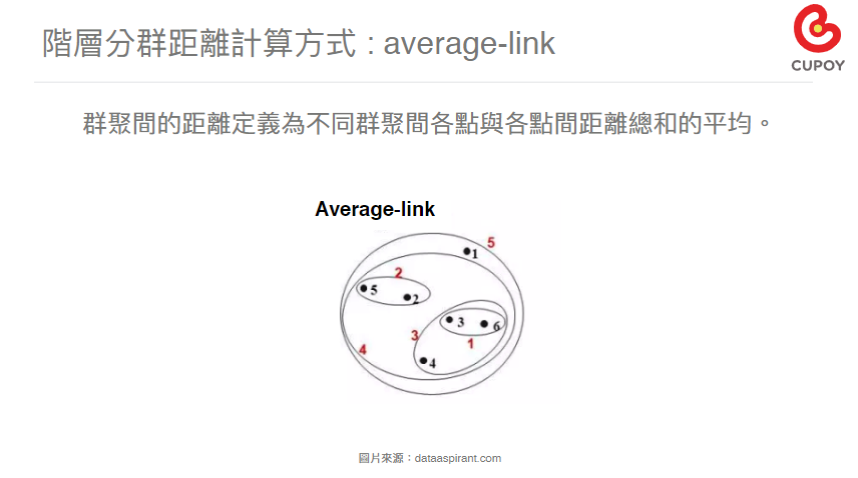

---
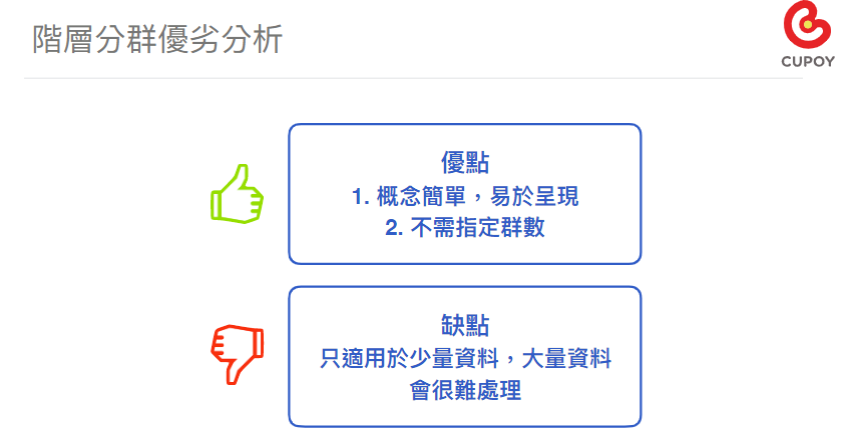

---

## 重要知識點複習
 - 階層式分群在無需定義群數的情況下做資料的分群，而後可以用不同的距離定義方式決定資料群組。
 - 分群距離計算方式有 single-link, complete-link, average-link。
 - 概念念簡單且容易易呈現，但不適合⽤用在⼤大資料。

# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

np.random.seed(5)

%matplotlib inline
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [2]:
def plot_3d_distribution(X, y, title, fignum=1):
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title(title)
    ax.set_xlabel("Sepal Length")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("Sepal Width")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("Petal Length")
    ax.w_zaxis.set_ticklabels([])


In [3]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_single', AgglomerativeClustering(n_clusters=3, linkage="single")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

 - **ward** minimizes the variance of the clusters being merged.
 - **average** uses the average of the distances of each observation of the two sets.
 - **complete** or maximum linkage uses the maximum distances between all observations of the two sets.
 - **single** uses the minimum of the distances between all observations of the two set


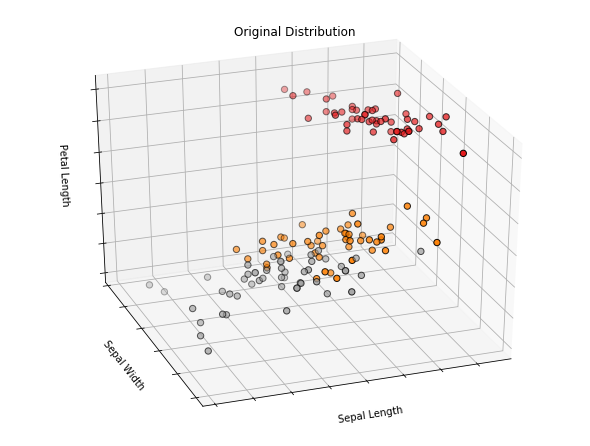

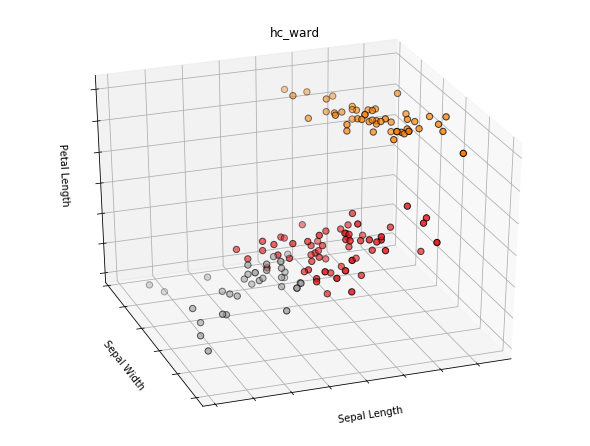

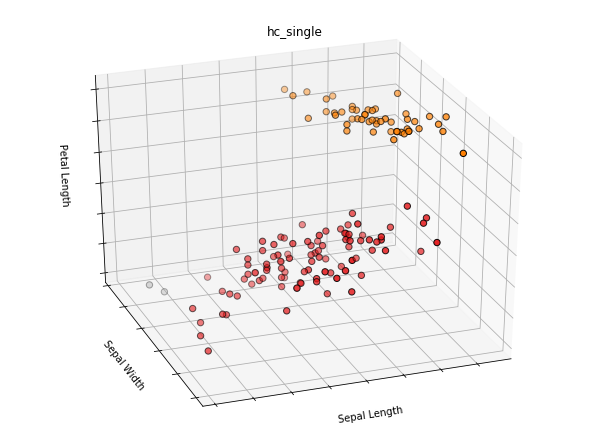

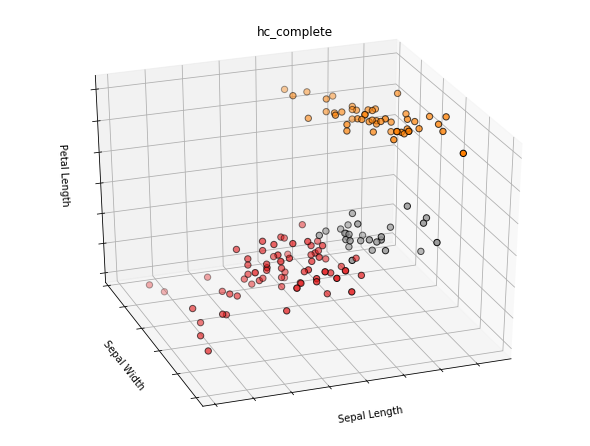

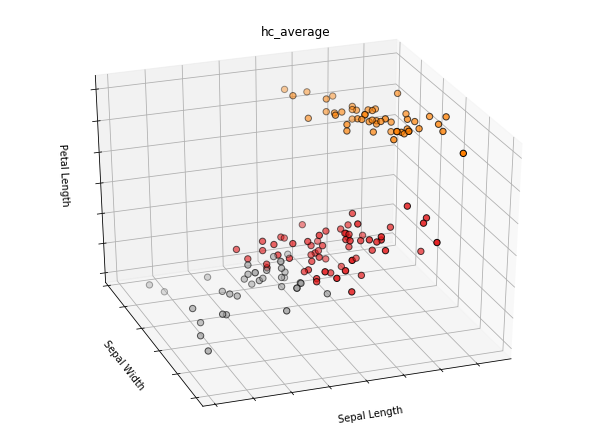

In [4]:
fignum = 1
plot_3d_distribution(X, y, title='Original Distribution', fignum=fignum)

for name, est in estimators:
    fignum += 1
    labels = est.fit_predict(X, y)
    plot_3d_distribution(X, labels, title=name, fignum=fignum)

